In [1]:
import fsspec
import pandas as pd
from pangeo_forge_recipes.patterns import ConcatDim, FilePattern
from pangeo_forge_recipes.recipes import HDFReferenceRecipe, setup_logging, XarrayZarrRecipe
from pangeo_forge_recipes.storage import FSSpecTarget, MetadataTarget
import xarray as xr
import intake
import time
setup_logging()

In [2]:
times=[]
times1=[]
times2=[]

In [8]:
x=[1,5,15,30]

In [19]:
times,times1,times2

([42.584036111831665,
  206.55842804908752,
  696.4677500724792,
  1488.0103271007538],
 [4.186963081359863, 3.620476007461548, 4.340974807739258, 3.2129065990448],
 [20.263303518295288,
  20.426461219787598,
  20.355683088302612,
  17.941014766693115])

In [24]:
1400/60

23.333333333333332

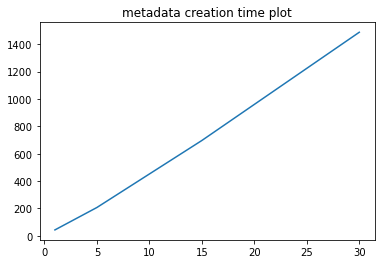

In [20]:
import matplotlib.pyplot as plt
plt.plot(x,times)
plt.title("metadata creation time plot")
plt.show()

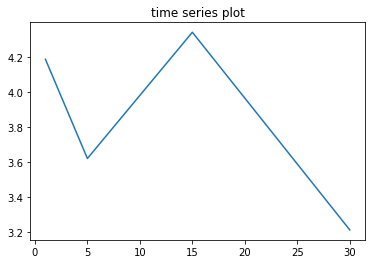

In [22]:
plt.plot(x,times1)
plt.title("time series plot")
plt.show()

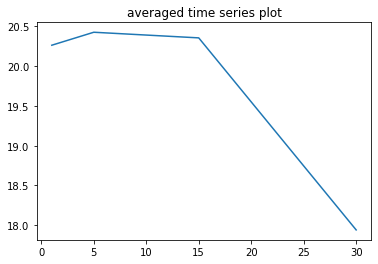

In [23]:
plt.plot(x,times2)
plt.title("averaged time series plot")
plt.show()

pangeo_forge_recipes.storage - INFO - Opening 'https://portal.nccs.nasa.gov/datashare/gmao/geos-fp/das/Y2022/M12/D01/GEOS.fp.asm.inst1_2d_lfo_Nx.20221201_0000.V01.nc4' directly.
pangeo_forge_recipes.storage - INFO - Opening 'https://portal.nccs.nasa.gov/datashare/gmao/geos-fp/das/Y2022/M12/D01/GEOS.fp.asm.inst1_2d_lfo_Nx.20221201_0100.V01.nc4' directly.
pangeo_forge_recipes.storage - INFO - Opening 'https://portal.nccs.nasa.gov/datashare/gmao/geos-fp/das/Y2022/M12/D01/GEOS.fp.asm.inst1_2d_lfo_Nx.20221201_0200.V01.nc4' directly.
pangeo_forge_recipes.storage - INFO - Opening 'https://portal.nccs.nasa.gov/datashare/gmao/geos-fp/das/Y2022/M12/D01/GEOS.fp.asm.inst1_2d_lfo_Nx.20221201_0300.V01.nc4' directly.
pangeo_forge_recipes.storage - INFO - Opening 'https://portal.nccs.nasa.gov/datashare/gmao/geos-fp/das/Y2022/M12/D01/GEOS.fp.asm.inst1_2d_lfo_Nx.20221201_0400.V01.nc4' directly.
pangeo_forge_recipes.storage - INFO - Opening 'https://portal.nccs.nasa.gov/datashare/gmao/geos-fp/das/Y2022/M

/home/jovyan/users_conda_envs/nb2/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'HLML' has multiple fill values {999999986991104.0, 9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/jovyan/users_conda_envs/nb2/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'PS' has multiple fill values {999999986991104.0, 9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/jovyan/users_conda_envs/nb2/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'QLML' has multiple fill values {999999986991104.0, 9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/jovyan/users_conda_envs/nb2/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'SPEEDLML' has multiple fill values {999999986991104.0, 9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable

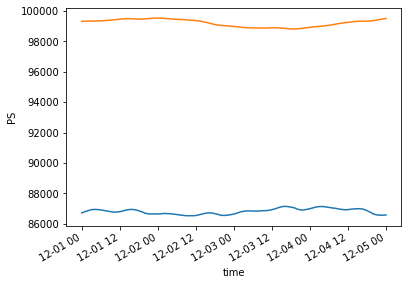

In [10]:

dates = pd.date_range(f"2022-12-01", "2022-12-30", freq="1H")
def make_url(time):
    url_format = (
        f"https://portal.nccs.nasa.gov/datashare/gmao/geos-fp/das/Y{time:%Y}/M{time:%m}/D{time:%d}/"
        f"GEOS.fp.asm.inst1_2d_lfo_Nx.{time:%Y%m%d}_{time:%H}00.V01.nc4"
    )
    return url_format.format(time=time)
time_concat_dim = ConcatDim("time", dates, nitems_per_file=1)
pattern = FilePattern(make_url, time_concat_dim)
for key in pattern:
    break
url = pattern[key]
recipe = HDFReferenceRecipe(
    pattern,
    inline_threshold=100,
    concat_dims = ["time"],
    identical_dims= ["lat", "lon"],
    coo_map={"time": "cf:time"}
)
out_target = FSSpecTarget(fs=fsspec.filesystem("file"), root_path="./kerchunk")
run_function = recipe.to_function()
a=time.time()
run_function()
b=time.time()
times.append(b-a)

catalog = intake.open_catalog("./kerchunk/reference.yaml")
ds = catalog["data"].to_dask()

e=time.time()
sample = ds["PS"].sel(lat=25.6, lon=-100.22, method="nearest")
sample.plot()
f=time.time()
times1.append(f-e)

c=time.time()
clip=ds.sel(lat=slice(25.6,100.0), lon=slice(-100.2,-50.0)).mean(dim=['lat','lon'],skipna=True)["PS"]
clip.plot()
d=time.time()
times2.append(d-c)

In [ ]:
times

catalog = intake.open_catalog("./kerchunk/reference.yaml")
ds = catalog["data"].to_dask()
%%time
sample = ds["PS"].sel(lat=25.6, lon=-100.22, method="nearest")
sample.plot()